In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [44]:
df = pd.read_csv('convert2.csv', names=['text', 'sentiment'], header=None)
df

,text,sentiment
0,ประเทศเราผลิตและส่งออกยาสูบเยอะสุดในโลกจิงป่าวคับ,neu
1,คะ,neu
2,อิเหี้ยออมทำกูอยากกินเอ็มเค,neg
3,��😅😅,neu
4,สวัสดีวันพุธ แนน อะไรนะ,neu
...,...,...
29920,ที่จริงเรื่องนี้ควรใช้โอกาสนี้ในการเปลี่ยนพฤติ...,neu
29921,ใครเจอปัญหาความเอาเปรียบของบริษัทประกันบ้างครั...,neg
29922,ไม่สามารถบินได้เนื่องจากโควิด ทางสายการบินเลยใ...,neg
29923,ยื่นเอกสารสินเชื่อ 7วัน บอกไม่อนุมัติ ทั้งที่เ...,neu


<Axes: xlabel='sentiment'>

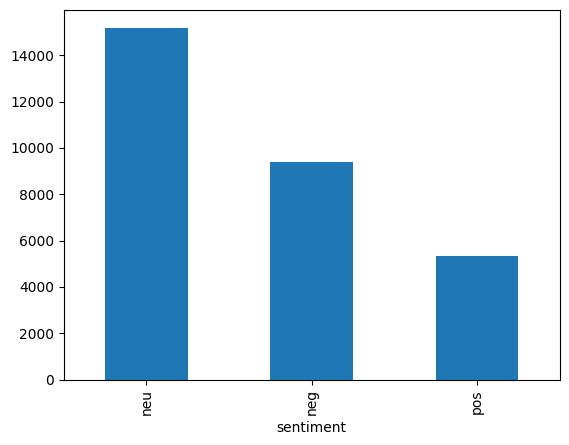

In [45]:
df['sentiment'].value_counts().plot.bar()

In [46]:
from pythainlp.corpus.common import thai_stopwords
thai_stopwords = list(thai_stopwords())
thai_stopwords

['เพียงไร',
 'ไกลๆ',
 'ยิ่งใหญ่',
 'บน',
 'ชาว',
 'ไม่ค่อยจะ',
 'เต็มไปหมด',
 'แห่งใด',
 'บอกแล้ว',
 'นำมา',
 'คราวหนึ่ง',
 'เฉยๆ',
 'นอกจากนั้น',
 'อย่างเช่น',
 'ครั้งไหน',
 'ครัน',
 'น่าจะ',
 'อื่นๆ',
 'นับตั้งแต่',
 'จนเมื่อ',
 'คราวใด',
 'เป็นเพราะ',
 'หารือ',
 'ใกล้ๆ',
 'อยู่',
 'เร็วๆ',
 'ใช่ไหม',
 'แต่ไหน',
 'ถึงแก่',
 'พยายาม',
 'เช่นไร',
 'ผู้',
 'พอกัน',
 'ไม่ว่า',
 'เอ็ง',
 'ประการ',
 'พอ',
 'ฯ',
 'อย่างไรเสีย',
 'ราย',
 'เช่นกัน',
 'ซึ่ง',
 'ครั้งที่',
 'นอกเหนือจาก',
 'เป็นอันว่า',
 'อย่าง',
 'ที่ไหน',
 'เสียนั่นเอง',
 'เสียก่อน',
 'พอดี',
 'แห่งนั้น',
 'เมื่อเย็น',
 'จัง',
 'ที่แท้จริง',
 'ช่วงๆ',
 'แต่เมื่อ',
 'คุณๆ',
 'หน',
 'คล้าย',
 'ทันทีทันใด',
 'เห็นว่า',
 'เล็ก',
 'ทุกแห่ง',
 'นั้นๆ',
 'ไกล',
 'พวกกัน',
 'ใหญ่',
 'นาน',
 'วันนี้',
 'กระผม',
 'จากนี้',
 'ตรง',
 'นับแต่',
 'รับ',
 'หนึ่ง',
 'ที่แล้ว',
 'ใคร',
 'คล้ายกับ',
 'ง่ายๆ',
 'ส่วนที่',
 'ให้ไป',
 'ตลอดศก',
 'แต่นั้น',
 'ซึ่งๆ',
 'ยังงั้น',
 'ค่อย',
 'ช่วงถัดไป',
 'คราวไหน',
 'รวมทั้ง',
 'เท่านั้น',
 'ซึ่งกัน

In [60]:
from pythainlp import word_tokenize
def text_process(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":", "!", '"', "ๆ", "ฯ","™","#","/","https","http","�","😅","💨","😬","👍🏻","‼️","@","/","<",">","😂","😭","☺️","❤️","😍"))
    final = word_tokenize(final)
    final = " ".join(word for word in final)
    final = " ".join(word for word in final.split() 
                     if word.lower not in thai_stopwords)
    return final
df['text_tokens'] = df['text'].apply(text_process)
df.to_csv("text_tokent.csv", index=False, encoding='utf-8-sig')
df

,text,sentiment,text_tokens
0,ประเทศเราผลิตและส่งออกยาสูบเยอะสุดในโลกจิงป่าวคับ,neu,ประเทศ เรา ผลิต และ ส่งออก ยาสูบ เยอะ สุด ใน โ...
1,คะ,neu,คะ
2,อิเหี้ยออมทำกูอยากกินเอ็มเค,neg,อิ เหี้ย ออม ทำ กู อยาก กิน เอ็ม เค
3,��😅😅,neu,
4,สวัสดีวันพุธ แนน อะไรนะ,neu,สวัสดี วัน พุธ แนน อะไร นะ
...,...,...,...
29920,ที่จริงเรื่องนี้ควรใช้โอกาสนี้ในการเปลี่ยนพฤติ...,neu,ที่จริง เรื่อง นี้ ควร ใช้ โอกาส นี้ ใน การ เป...
29921,ใครเจอปัญหาความเอาเปรียบของบริษัทประกันบ้างครั...,neg,ใคร เจอ ปัญหา ความ เอาเปรียบ ของ บริษัท ประกัน...
29922,ไม่สามารถบินได้เนื่องจากโควิด ทางสายการบินเลยใ...,neg,ไม่ สามารถ บิน ได้ เนื่องจาก โควิด ทาง สายการบ...
29923,ยื่นเอกสารสินเชื่อ 7วัน บอกไม่อนุมัติ ทั้งที่เ...,neu,ยื่น เอกสาร สินเชื่อ 7 วัน บอก ไม่ อนุมัติ ทั้...


In [61]:
from sklearn.model_selection import train_test_split
X = df[['text_tokens']]
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [62]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(analyzer=lambda x:x.split(' '))
cvec.fit_transform(X_train['text_tokens'])
cvec.vocabulary_

{'ผม': 17244,
 'กิน': 10842,
 'เบียร์': 24898,
 'สิงห์': 21689,
 'ครับ': 11622,
 'สน': 21118,
 'จัย': 12734,
 'แคม': 26595,
 'รี่': 19747,
 'กับ': 10471,
 'แอ': 27263,
 'คค': 11466,
 'อด': 22751,
 'ดี': 13863,
 'แม็ก': 27052,
 'ไม่': 28306,
 'มี': 18728,
 'สัก': 21451,
 'รุ่น': 19784,
 'ยกเว้น': 18948,
 'ตัว': 14255,
 'ท็อป': 15403,
 'ยก': 18938,
 'สูง': 21877,
 'ที่': 15275,
 'มา': 18603,
 'ให้': 28048,
 'งก': 12438,
 'จริง': 12636,
 'ใช้': 27938,
 '4': 1304,
 'ประตู': 16729,
 'รอง': 19403,
 'ยัง': 19035,
 'พับ': 17931,
 'ไฟฟ้า': 28272,
 'เลย': 25657,
 'รัฐประหาร': 19549,
 'ราว': 19698,
 '56': 1523,
 'ล้าน': 20431,
 'เท่ากับ': 24699,
 'ว่า': 20829,
 'รัฐบาล': 19548,
 'นี้': 15924,
 'สร้าง': 21310,
 'หนี้': 22100,
 '44': 1370,
 'ใน': 27965,
 'นั้น': 15764,
 'เป็น': 25037,
 'งบ': 12451,
 'จัดการ': 12688,
 'โควิด': 27399,
 '2': 825,
 'เหลือ': 26151,
 'ไป': 28240,
 'คือ': 12242,
 'สิ่งปลูกสร้าง': 21728,
 'รอบ': 19423,
 'ประเทศ': 16795,
 'มากมาย': 18607,
 'มหาศาล': 18479,
 'เมื่อ': 25424,


In [64]:
train_bow = cvec.transform(X_train['text_tokens'])
pd.DataFrame(train_bow.toarray(), columns=cvec.get_feature_names_out(), index=X_train['text_tokens'])
dt = pd.DataFrame(train_bow.toarray(), columns=cvec.get_feature_names_out(), index=X_train['text_tokens'])
dt.to_csv("feature.csv", index=False, encoding='utf-8-sig')


In [55]:
from sklearn.discriminant_analysis import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import make_pipeline
lr = LogisticRegression(solver='liblinear', max_iter=1000000)
# lr = make_pipeline(StandardScaler(with_mean=False), LogisticRegression(solver='liblinear', max_iter=1000000))
lr.fit(train_bow, y_train)

Pipeline(steps=[('standardscaler', StandardScaler(with_mean=False)),
                ('logisticregression',
                 LogisticRegression(max_iter=1000000, solver='liblinear'))])

In [56]:
from sklearn.metrics import confusion_matrix,classification_report
test_bow = cvec.transform(X_test['text_tokens'])
test_predictions = lr.predict(test_bow)
print(len(test_predictions))
print(len(y_test))
test_bow = cvec.transform(X_test['text_tokens'])
test_predictions = lr.predict(test_bow)
print(classification_report(test_predictions, y_test))

8978
8978
              precision    recall  f1-score   support

         neg       0.55      0.55      0.55      2762
         neu       0.63      0.65      0.64      4468
         pos       0.37      0.34      0.35      1748

    accuracy                           0.56      8978
   macro avg       0.51      0.51      0.51      8978
weighted avg       0.55      0.56      0.55      8978



In [ ]:
my_text = 'ผมรู้สึกปวดขา'
my_tokens = text_process(my_text)
my_bow = cvec.transform(pd.Series([my_tokens]))
my_predictions = lr.predict(my_bow)
my_predictions

array([0], dtype=int64)